In [1]:
options(warn = -1, tidyverse.quiet = T)

library(tidyverse, warn.conflicts = F, quietly = T)
library(arrow, warn.conflicts = F)
library(cowplot, warn.conflicts = F)
library(yardstick, warn.conflicts = F)
library(kableExtra, warn.conflicts = F)

In [2]:
feature_phenotypes <- c(
    "Alzheimer's" = "b_G30",
    "Cerebral infarction" = "b_I63",
    "Acute myocardial infarction" = "b_I21",
    "Essential hypertension" = "b_I10",
    "Obesity" = "b_E66",
    "Acute ischemic heart disease" = "b_I24",
    "Ischemic heart disease" = "b_I25",
    "Pulmonary heart diseases" = "b_I27",
    "Other heart disease" = "b_I51",
    "Other cerebrovascular" = "b_I67",
    "Type 1 diabetes mellitus" = "b_E10",
    "Type 2 diabetes mellitus" = "b_E11",
    "HbA1c" = "q_30750_0",
    "HDL cholesterol" = "q_30760_0",
    "Glucose" = "q_30740_0",
    "Cholesterol" = "q_30690_0",
    "Triglycerides" = "q_30870_0",
    "Lipoprotein A" = "q_30790_0",
    "Apolipoprotein B" = "q_30640_0",
    "Creatinine" = "q_30700_0"
)
reversed_feature_phenotypes = names(feature_phenotypes) %>% set_names(feature_phenotypes)

In [3]:
gcov_df <- read_tsv("data/gcov/igap.naive.tsv", show_col_types = F)
coef_df <- read_parquet("plot_data/maxgcp_coef.parquet")

In [4]:
gcov_plot_df <- gcov_df %>%
    filter(Component == "Cor_All") %>%
    select(-Component) %>%
    filter(str_starts(phenotype_id, "b_|q_")) %>%
    mutate(phenotype_id = recode(phenotype_id, !!!reversed_feature_phenotypes)) %>%
    arrange(desc(Value)) %>%
    select(`Phenotype` = phenotype_id, `Genetic correlation` = Value, `Standard error` = SD) %>%
    inner_join(coef_df, by = c("Phenotype" = "feature")) %>%
    rename(`MaxGCP coefficient` = value)

gcov_plot_df %>% head(2)

Phenotype,Genetic correlation,Standard error,MaxGCP coefficient
<chr>,<dbl>,<dbl>,<dbl>
Alzheimer's,0.792638,0.245018,10.7191032
Other cerebrovascular,0.151155,0.154478,0.5079318


Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2

Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom



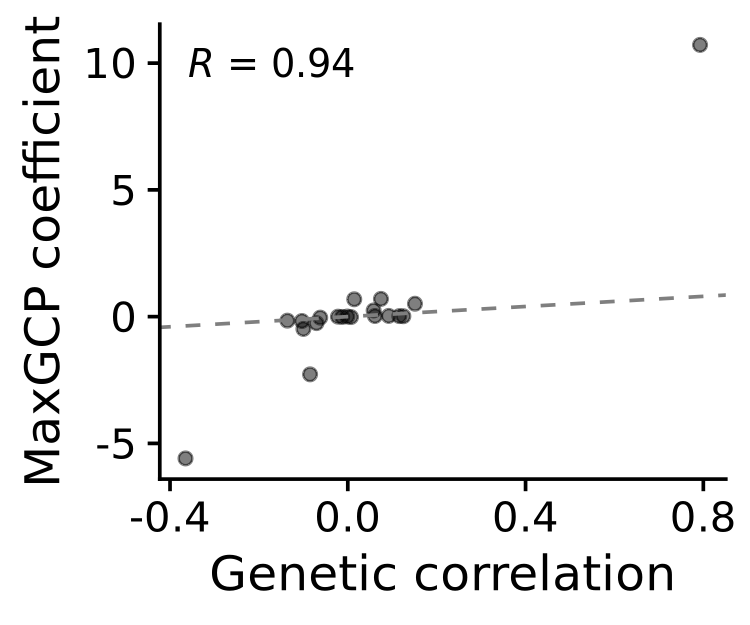

In [5]:
options(repr.plot.width = 3, repr.plot.height = 2.5, repr.plot.res = 250)

rg_vs_coef_plot <- gcov_plot_df %>%
    ggplot(aes(x = `Genetic correlation`, y = `MaxGCP coefficient`)) +
    geom_point(alpha = 0.5) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "grey50") +
    theme_cowplot() +
    ggpmisc::stat_correlation()

save_plot("img/rg_vs_coef.png", rg_vs_coef_plot, base_width = 3, base_height = 2.5,
          dpi = 400, bg = "white")

rg_vs_coef_plot

In [6]:
gcov_plot_df %>%
    kbl("latex", digits = 3) %>%
    kable_classic

\begin{table}
\centering
\begin{tabular}[t]{l|r|r|r}
\hline
Phenotype & Genetic correlation & Standard error & MaxGCP coefficient\\
\hline
Alzheimer's & 0.793 & 0.245 & 10.719\\
\hline
Other cerebrovascular & 0.151 & 0.154 & 0.508\\
\hline
Apolipoprotein B & 0.125 & 0.060 & 0.017\\
\hline
Cholesterol & 0.116 & 0.056 & 0.022\\
\hline
Glucose & 0.092 & 0.053 & 0.029\\
\hline
Type 2 diabetes mellitus & 0.075 & 0.064 & 0.699\\
\hline
Triglycerides & 0.061 & 0.044 & 0.025\\
\hline
Cerebral infarction & 0.058 & 0.150 & 0.244\\
\hline
Acute ischemic heart disease & 0.015 & 0.159 & 0.684\\
\hline
HbA1c & 0.007 & 0.043 & -0.017\\
\hline
HDL cholesterol & -0.001 & 0.041 & 0.005\\
\hline
Essential hypertension & -0.013 & 0.053 & -0.012\\
\hline
Lipoprotein A & -0.022 & 0.142 & -0.001\\
\hline
Creatinine & -0.062 & 0.044 & -0.040\\
\hline
Obesity & -0.070 & 0.068 & -0.255\\
\hline
Type 1 diabetes mellitus & -0.085 & 0.263 & -2.277\\
\hline
Acute myocardial infarction & -0.100 & 0.068 & -0.485\\
\h